In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

import seaborn as sns
import os

sns.set_theme(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_theme(font_scale=0.7)


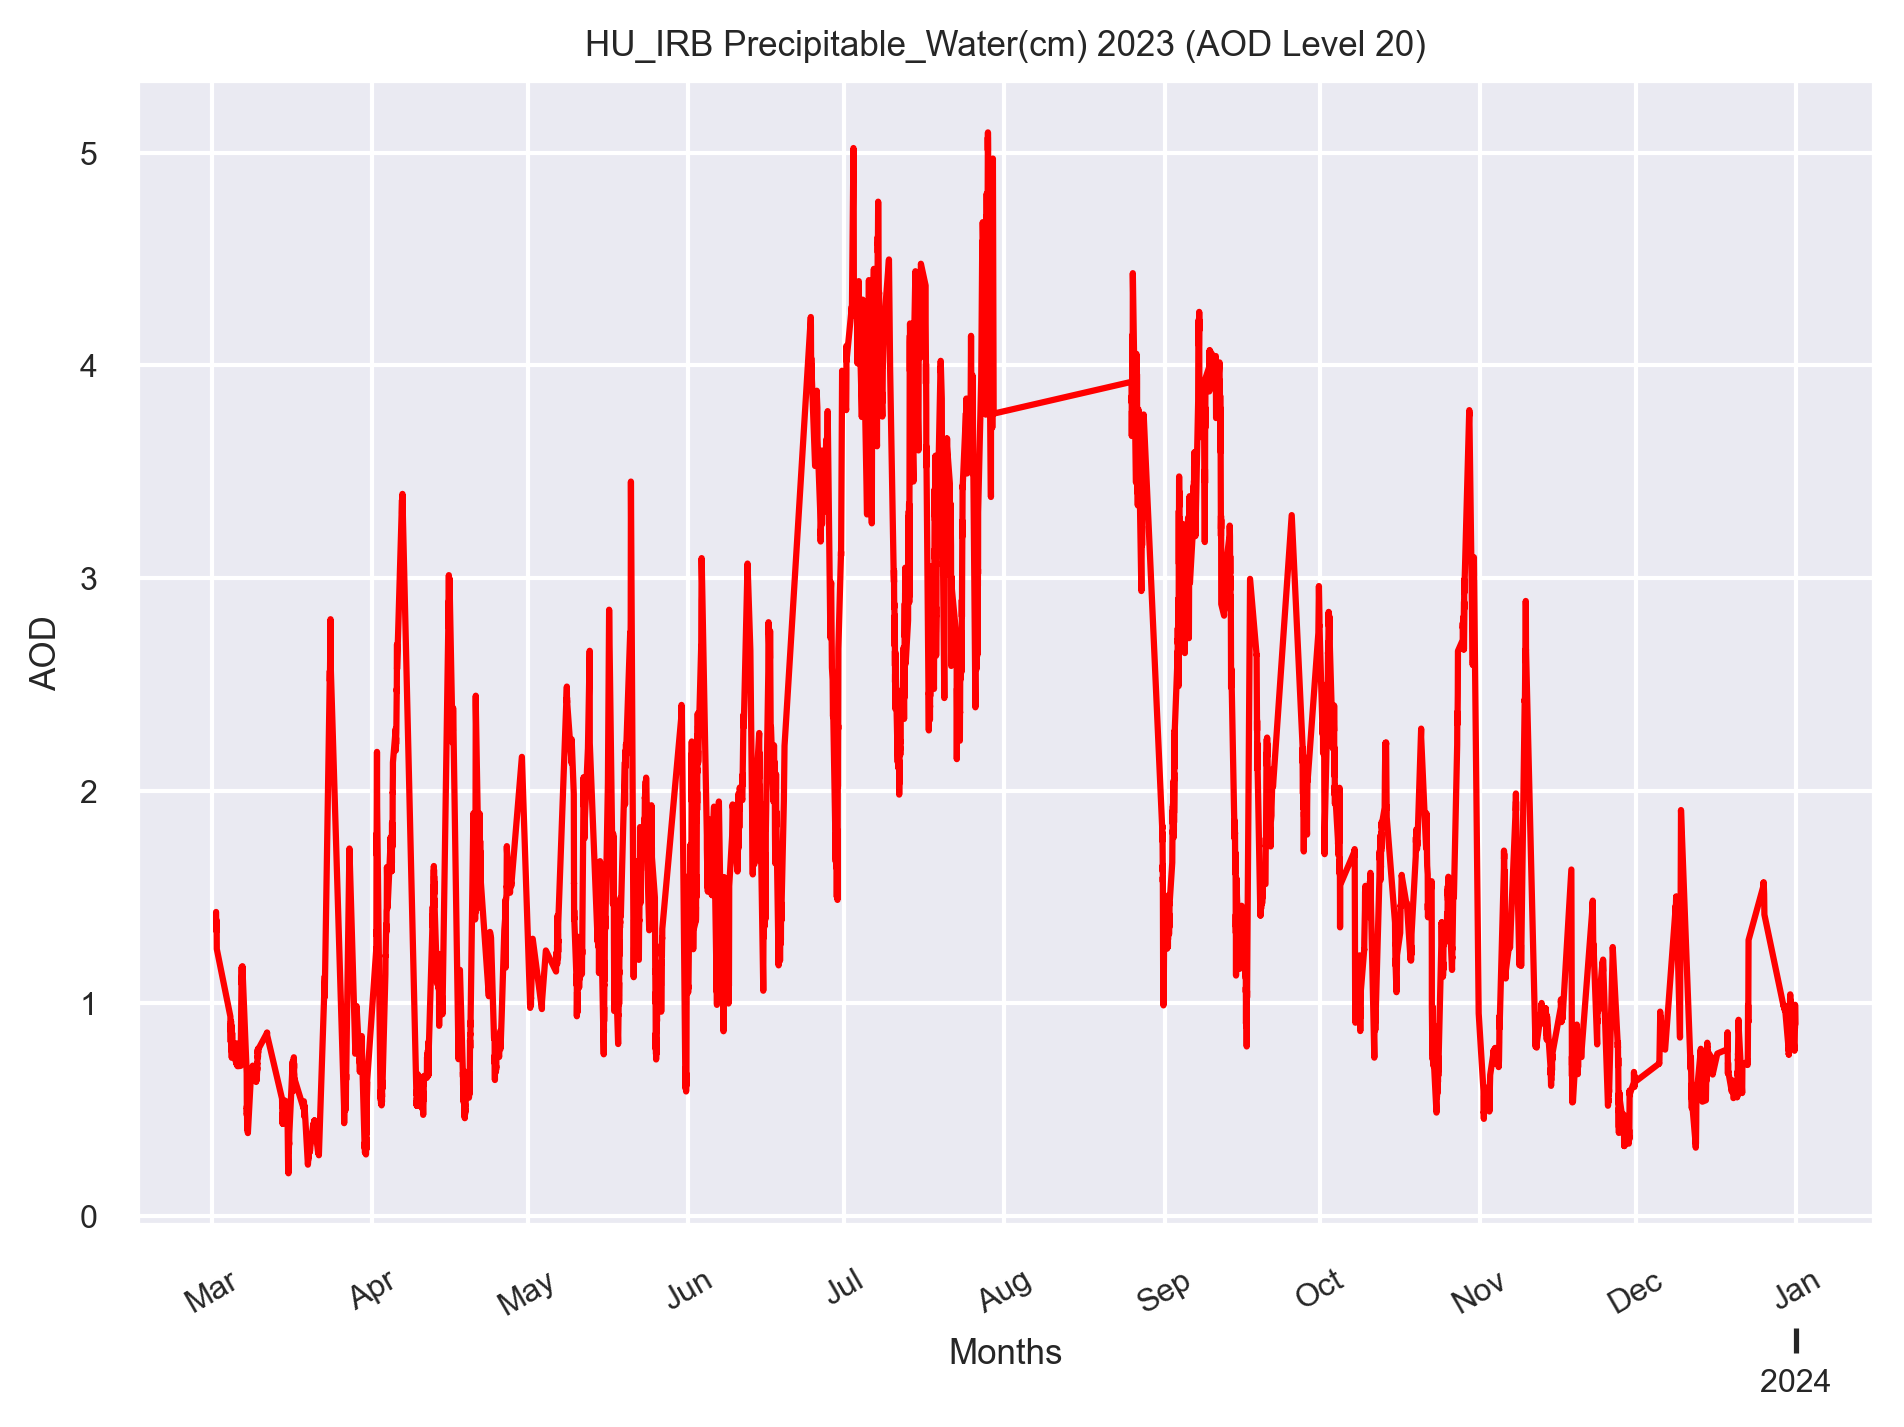

In [94]:
# @hidden_cell

def time_series(wavelength, site, year, level="15", show_scatter=True):
    """
    Plots the AOD time series for a given site, year, wavelength, and AOD level.
    
    Parameters:
        wavelength (str): The AOD wavelength to plot (e.g., "AOD_500nm").
        site (str): The site name (e.g., "HU_IRB", "GSFC", "SERC").
        year (int): The year of the data (e.g., 2025).
        level (str): The AOD level ("15" or "20", default is "15").
        show_scatter (bool): Whether to show the scatter plot (default is True).
    """
    
    # Define the file path
    data_folder = rf"C:\Users\Sandy\Documents\Aeronet\Data\{site}\Processed"
    file_name = f"{site}_processed_{year}_AOD{level}_directsun.csv"  # Adjust filename to include level
    file_path = os.path.join(data_folder, file_name)

    # Read the CSV file
    df = pd.read_csv(file_path, parse_dates=['DateTime'])

    # Determine the number of subplots
    num_plots = 2 if show_scatter else 1
    fig, axes = plt.subplots(num_plots, 1, sharex=True)

    # Line plot
    ax_line = axes if num_plots == 1 else axes[1]
    g = sns.lineplot(ax=ax_line, x="DateTime", y=wavelength, data=df, color='red')

    # Scatter plot (if enabled)
    if show_scatter:
        sns.scatterplot(ax=axes[0], x="DateTime", y=wavelength, data=df, s=40, color='black')

    # Formatting the x-axis for months
    ax_line.xaxis.set_major_locator(dates.MonthLocator())
    ax_line.xaxis.set_major_formatter(dates.DateFormatter('%b'))
    ax_line.tick_params(axis='x', rotation=30)

    # Adding a secondary x-axis for years
    sec_xaxis = ax_line.secondary_xaxis(-0.09)
    sec_xaxis.xaxis.set_major_locator(dates.YearLocator())
    sec_xaxis.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
    sec_xaxis.spines['bottom'].set_visible(False)

    # Set titles and labels
    g.set(title=f"{site} {wavelength} {year} (AOD Level {level})")
    ax_line.set(xlabel="Months", ylabel="AOD")

    if show_scatter:
        axes[0].set(ylabel="AOD")

    # Adjust layout
    plt.subplots_adjust(hspace=0.05)
    plt.tight_layout()

    # Show the plot
    plt.show()

time_series("Precipitable_Water(cm)", "HU_IRB", 2023, level="20", show_scatter=False) # D

## Compare 3 Sites

In [90]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates

def compare_time_series(wavelength, year, level="15", show_scatter=True):
    """
    Plots the AOD time series for all three sites (HU_IRB, GSFC, SERC) in a single plot.
    
    Parameters:
        wavelength (str): The AOD wavelength to plot (e.g., "AOD_500nm").
        year (int): The year of the data (e.g., 2025).
        level (str): The AOD level ("15" or "20", default is "15").
        show_scatter (bool): Whether to show scatter plots (default is True).
    """

    # Define site names and colors
    sites = ["HU_IRB", "GSFC", "SERC"]
    colors = {"HU_IRB": "red", "GSFC": "blue", "SERC": "green"}

    # Create the plot
    fig, axes = plt.subplots(2 if show_scatter else 1, 1, figsize=(16, 10), sharex=True)

    for site in sites:
        # Define file path
        data_folder = rf"C:\Users\Sandy\Documents\Aeronet\Data\{site}\Processed"
        file_name = f"{site}_processed_{year}_AOD{level}_directsun.csv"
        file_path = os.path.join(data_folder, file_name)

        # Check if file exists before reading
        if not os.path.exists(file_path):
            print(f"❌ File not found for {site}: {file_path}")
            continue

        # Read the CSV file
        df = pd.read_csv(file_path, parse_dates=['DateTime'])

        # Line plot
        ax_line = axes if not show_scatter else axes[1]
        sns.lineplot(ax=ax_line, x="DateTime", y=wavelength, data=df, linewidth=2, color=colors[site], label=site)

        # Scatter plot (if enabled)
        if show_scatter:
            sns.scatterplot(ax=axes[0], x="DateTime", y=wavelength, data=df, s=40, color=colors[site], alpha=0.6)

    # Formatting the x-axis for months
    ax_line.xaxis.set_major_locator(dates.MonthLocator())
    ax_line.xaxis.set_major_formatter(dates.DateFormatter('%b'))
    ax_line.tick_params(axis='x', rotation=30, labelsize=14)  # Increase tick font size

    # Adding a secondary x-axis for years
    sec_xaxis = ax_line.secondary_xaxis(-0.09)
    sec_xaxis.xaxis.set_major_locator(dates.YearLocator())
    sec_xaxis.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
    sec_xaxis.spines['bottom'].set_visible(False)
    sec_xaxis.tick_params(labelsize=14)  # Increase secondary x-axis font size

    # Set titles and labels with larger font sizes
    ax_line.set_title(f"AOD {wavelength} Time Series ({year}, AOD Level {level}) for All Sites", fontsize=18)
    ax_line.set_xlabel("Months", fontsize=16)
    ax_line.set_ylabel("AOD", fontsize=16)

    if show_scatter:
        axes[0].set_ylabel("AOD (Scatter)", fontsize=16)

    # Increase legend font size
    legend = ax_line.legend(fontsize=14)
    legend.set_title("Sites", prop={'size': 16})  # Increase legend title font size

    # Adjust layout
    plt.subplots_adjust(hspace=0.05)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:


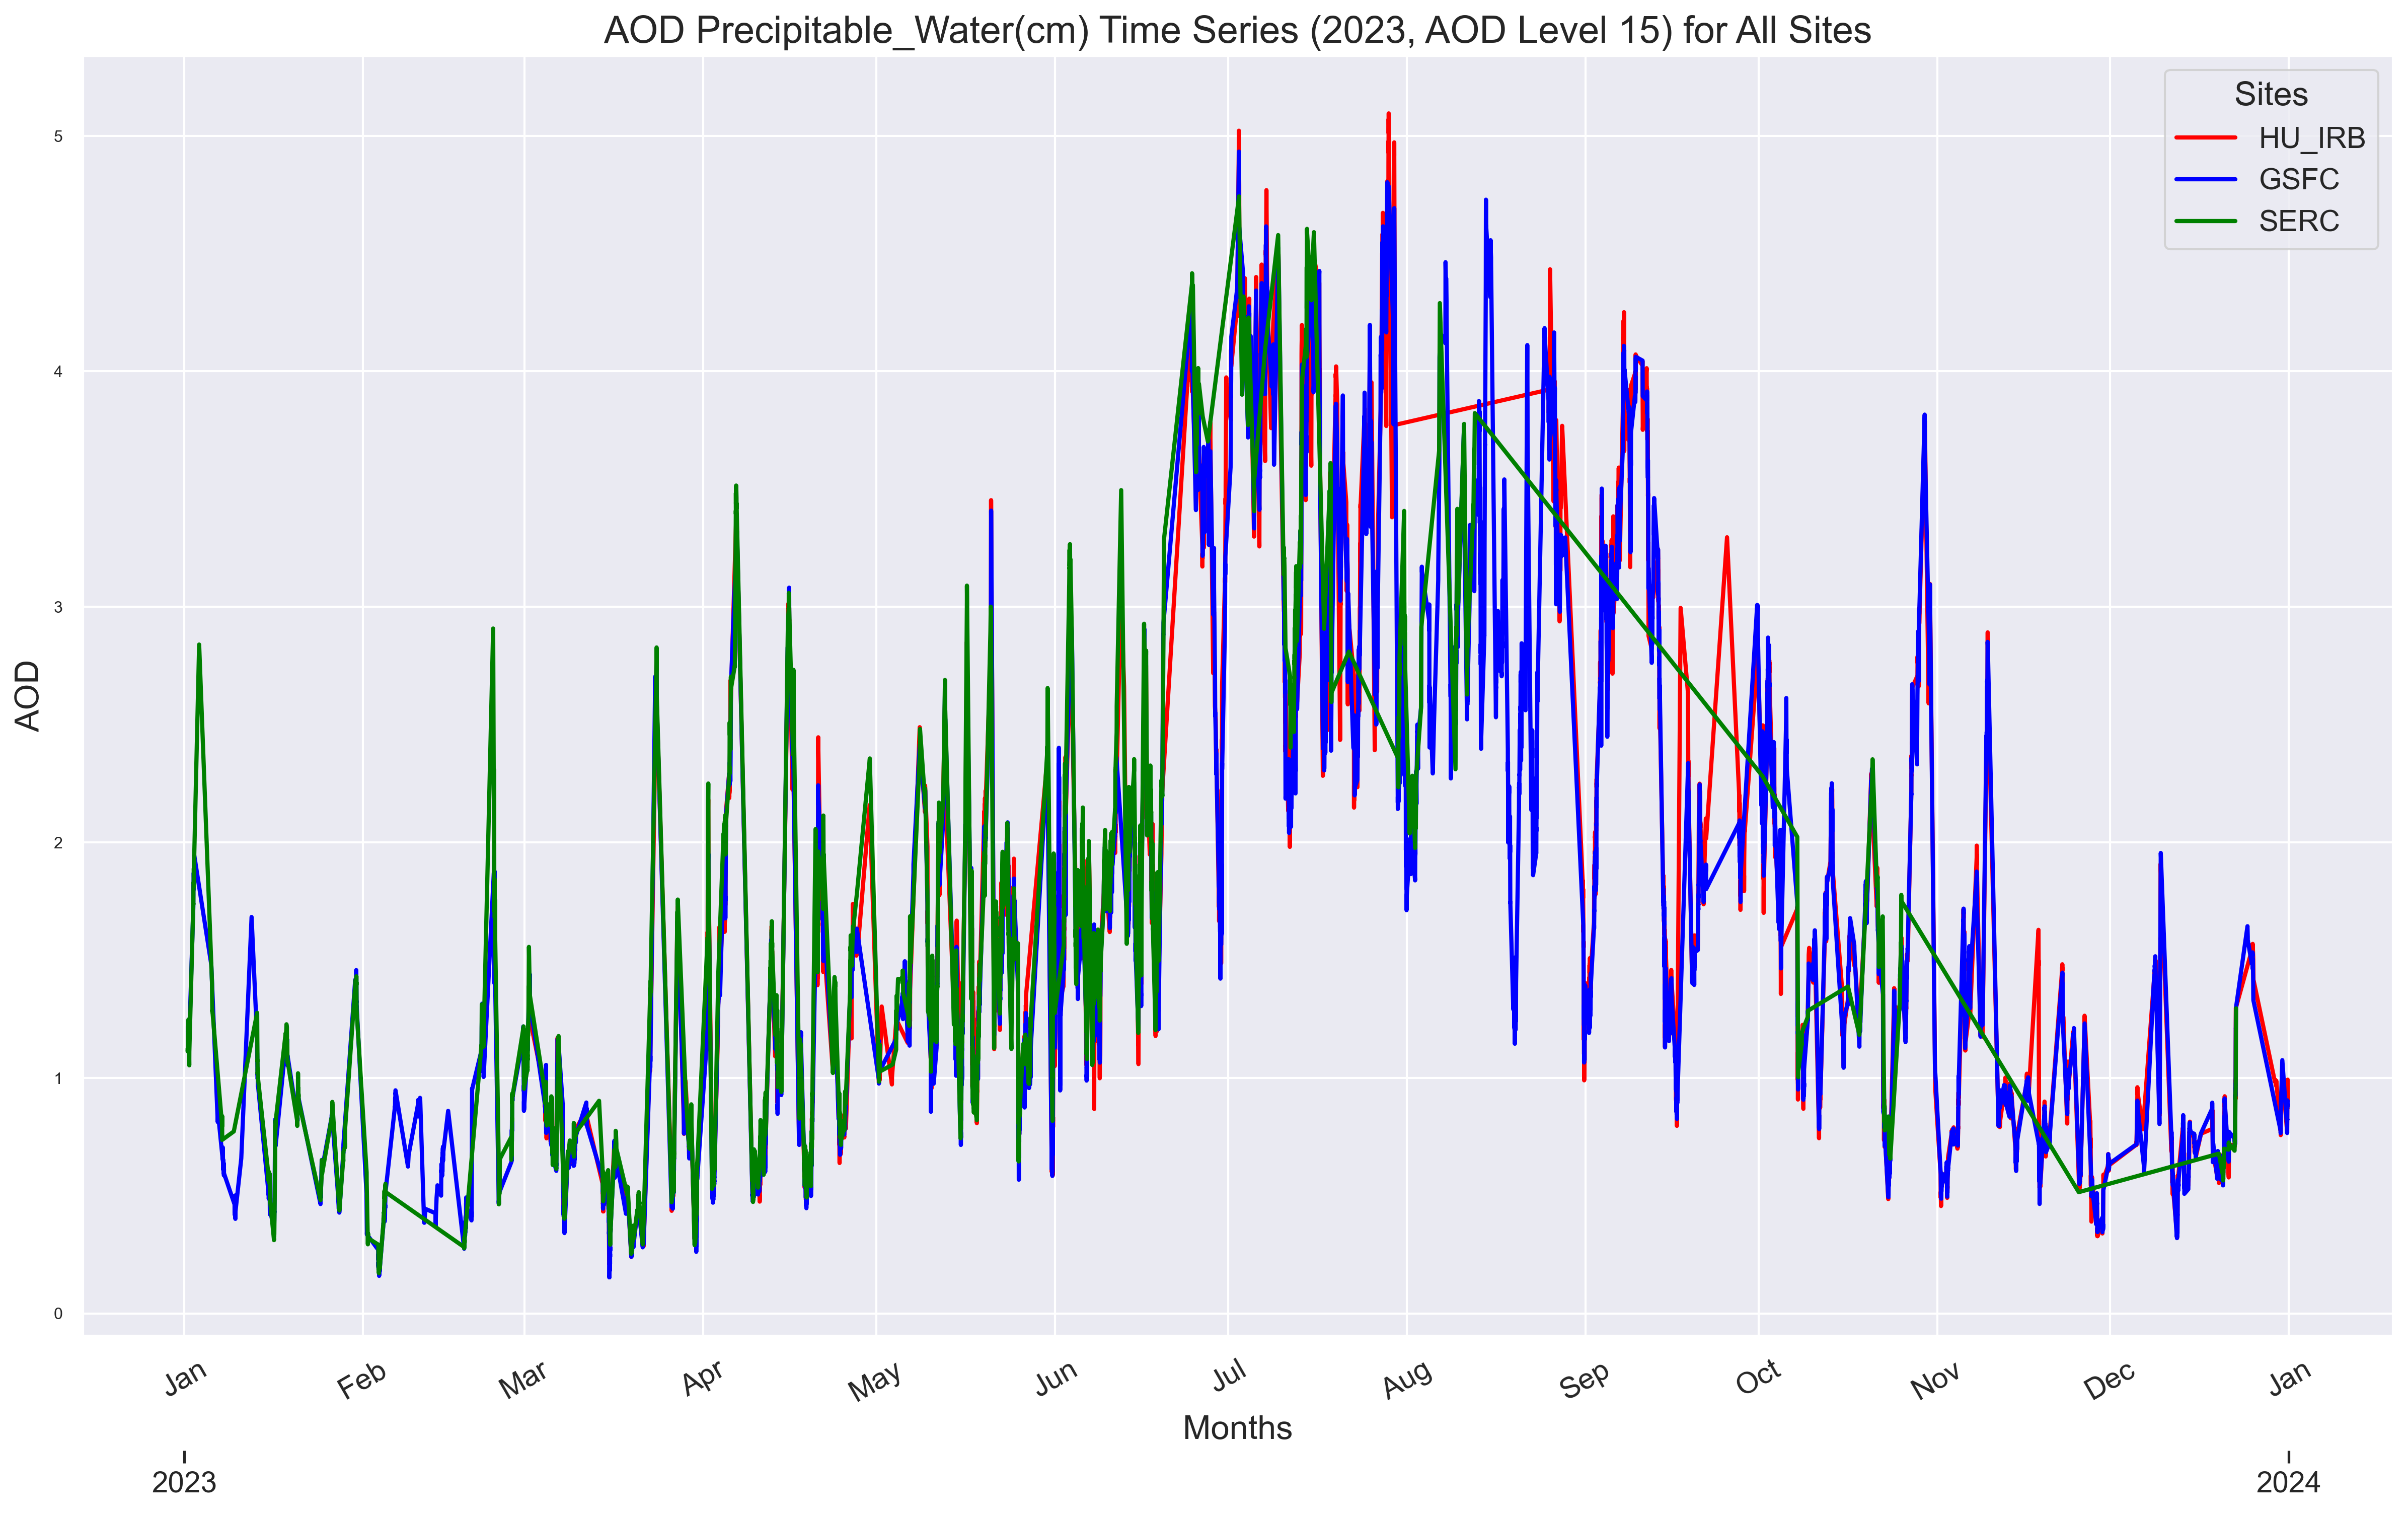

In [91]:
compare_time_series("Precipitable_Water(cm)", 2023, level="15", show_scatter=False)
